<h4 style="font-size: 20px;" align="center"><b>TEAM ID: PTID-CDS-JAN-24-1772</b></h4>
<h4 style="font-size: 20px;" align="center"><b>PROJECT ID: PRCP- 1001- RiceLeaf disease detection</b></h4>

#### **PROBLEM STATEMENT**

<ul style="font-size: 14px; line-height: 3em">
    <li>Task 1: Prepare a complete data analysis report on the given data.</li>
    <li>Task 2: Create a model which can classify the three major attacking diseases of
        rice plants like leaf blast, bacterial blight and brown spot.</li>
    <li>Task3: Analyze various techniques like Data Augmentation, etc and create a
        report on that.</li>
</ul>

<p style="font-size: 16px;">To create a model which can calssify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot based on the given images.</p>

#### **IMPORTING THE LIBRARIES**

In [1]:
import numpy as np 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h4 style="font-size: 16px;"><b>Some of the constants to be used in implementation.</b></h4>

In [2]:
# Constants
IMAGE_SIZE = (224, 224)
NUM_CLASSES = 3
BATCH_SIZE = 32
EPOCHS = 10
TRAIN_DATA_DIR = '../Data/'
TEST_DATA_DIR = '../Data/'

#### **PERFORMING AUGMENTATION and VISUALIZATION**

In [3]:
# Data Augmentation

# Initializing an instance of ImageDataGenerator class
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Scaling pixel values to [0, 1] range
    rotation_range=20, # random rotations of images applied within -20 to +20 degrees.
    width_shift_range=0.2, # horizontal shift of images upto 20% of the total width of the image.
    height_shift_range=0.2, # vertical shift of images upto 20% of total height
    shear_range=0.2, # shearing transformations within the range of 20%
    zoom_range=0.2, # randomly zoomed in or out by up to 20%.
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest') # filling the newly created pixels that may appear after a rotation or a width/ height shift.
# 'nearest'- fills the missing pixels with the nearest pixel value from the original image.

In [4]:
# generating batches of augmented images form a directory.
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR, # variable containing the directory path where the training images are located. 
    target_size=IMAGE_SIZE, #input images are resized
    batch_size=32, # batch size for training. (each batch contains 32 images)
    class_mode='categorical') 

Found 119 images belonging to 3 classes.


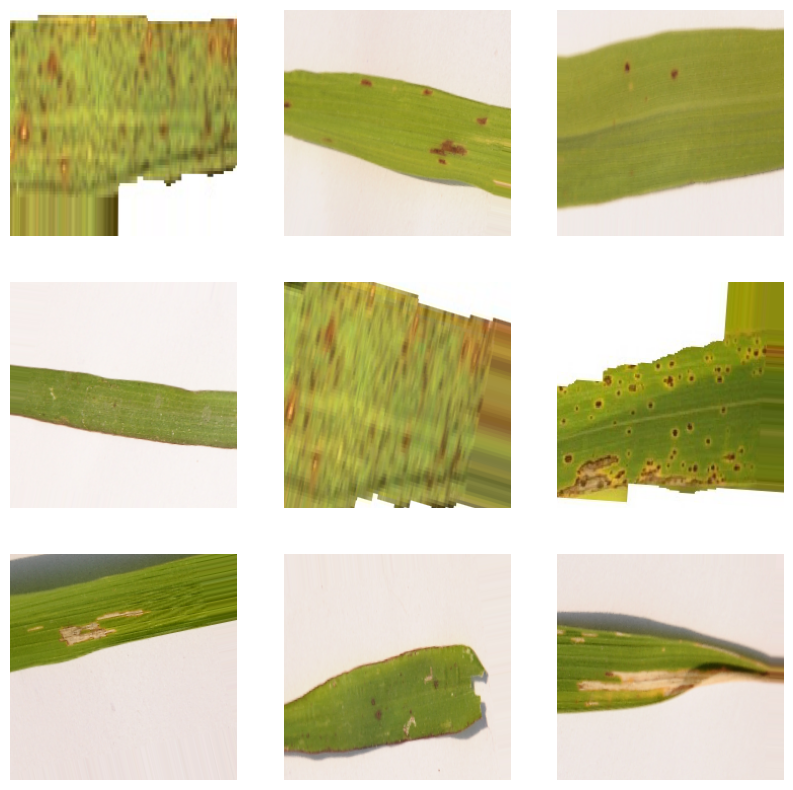

In [5]:
# Generating augmented images and displaying a subset

plt.figure(figsize=(10, 10))
for i in range(9):
    batch = next(train_generator)
    image = batch[0][0]  # Selecting the first image from the batch
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

#### **SCALING THE SUBSET**

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Scaling pixel values to [0, 1] during testing or validation.
# no data augmentation is supposed to be done for testing data so that the evaluation will be unbiased and more generalized to real world problems

#### **Loading the training and test dataset**

In [7]:
# Load training and test data
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 119 images belonging to 3 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    TEST_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)

Found 119 images belonging to 3 classes.


#### **MODEL BUILDING**

In [9]:
# Loading pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

# weights='imagenet': This parameter specifies that the model should be initialized with pre-trained weights from the ImageNet dataset. 
# include_top= False: indicates that the fully connected layers (top) of VGG16 model should not be included.
# by setting this to false, only the convolutional base of model is loaded without the dense layers.

In [10]:
# Adding custom classification layers on the top of  pre-trained VGG16 model
model = Sequential() # sequential model is a linear stack of layers, which aare added one by one
model.add(base_model)
model.add(GlobalAveragePooling2D()) # it reduces the dimensionality of the feature maps obtained from the convolutional base.
model.add(Dense(1024, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [11]:
# Freezing all layers in the base model (pre-trained VGG16) to prevent their weights from being updated during training.
for layer in base_model.layers:
    layer.trainable = False

# This freezing is done to use the pre-trained model as a fixed feature extractor, 
# where only the custom classification layers added on top will be trained on this dataset.

In [12]:
# Compiling the model (final step in configuring the model for training.)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE, # specifies no of iterations per epoch (i.e., total no of samples in the training dataset divided by the batch size)
    epochs=EPOCHS,
    validation_data=test_generator, # validation dataset at the end of each epoch
    validation_steps=test_generator.samples // BATCH_SIZE
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 74s 29s/step - accuracy: 0.3404 - loss: 1.1380 - val_accuracy: 0.4896 - val_loss: 0.9831
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.4062 - loss: 1.0593 - val_accuracy: 0.0000e+00 - val_loss: 1.7645
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 77s 31s/step - accuracy: 0.4129 - loss: 1.0696 - val_accuracy: 0.6771 - val_loss: 0.8124
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.5000 - loss: 0.9937 - val_accuracy: 0.2609 - val_loss: 1.0830
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 34s/step - accuracy: 0.4557 - loss: 1.0106 - val_accuracy: 0.3021 - val_loss: 1.0679
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.3478 - loss: 1.0672 - val_accuracy: 0.8261 - val_loss: 0.7284
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 33s/step - accuracy: 0.7198 - loss: 0.8354 - val_accuracy: 0.7604 - val_loss: 0.6677
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.5625 - loss: 0.9367 - val_accuracy: 0.0000e+00 - val_loss: 1.6

#### **MODEL EVALUATION**

#### **Training and Testing (accuracy and loss):**

In [14]:
print(f"Training Accuracy:{history.history['accuracy']}")
print(f"Training Loss: {history.history['loss']}")
print(f"Testing Accuracy: {history.history['val_accuracy']}")
print(f"Testing Loss: {history.history['val_loss']}")

Training Accuracy:[0.3448275923728943, 0.40625, 0.4252873659133911, 0.5, 0.4270833432674408, 0.3478260934352875, 0.6896551847457886, 0.5625, 0.6041666865348816, 0.5652173757553101]
Training Loss: [1.1511237621307373, 1.0592632293701172, 1.067248821258545, 0.9937159419059753, 1.00605309009552, 1.0672281980514526, 0.8509705662727356, 0.9366703033447266, 0.8373791575431824, 0.9478577375411987]
Testing Accuracy: [0.4895833432674408, 0.0, 0.6770833134651184, 0.260869562625885, 0.3020833432674408, 0.8260869383811951, 0.7604166865348816, 0.0, 0.8541666865348816, 0.47826087474823]
Testing Loss: [0.9831288456916809, 1.7645047903060913, 0.8124291896820068, 1.0829845666885376, 1.0679117441177368, 0.7284237146377563, 0.6676950454711914, 1.6474831104278564, 0.6271926164627075, 0.9973675012588501]


In [15]:
# Evaluating the model on the test data
evaluation = model.evaluate(test_generator)

# Print evaluation results
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 50s 12s/step - accuracy: 0.8459 - loss: 0.6711
Test Loss: 0.7265913486480713
Test Accuracy: 0.7815126180648804


In [16]:
# Evaluating the model on the train data
evaluation_for_training = model.evaluate(train_generator)

# Print evaluation results
print("Train Loss:", evaluation_for_training[0])
print("Train Accuracy:", evaluation_for_training[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 50s 12s/step - accuracy: 0.7650 - loss: 0.7685
Train Loss: 0.7626104950904846
Train Accuracy: 0.756302535533905


#### **Visualization of the model performance**

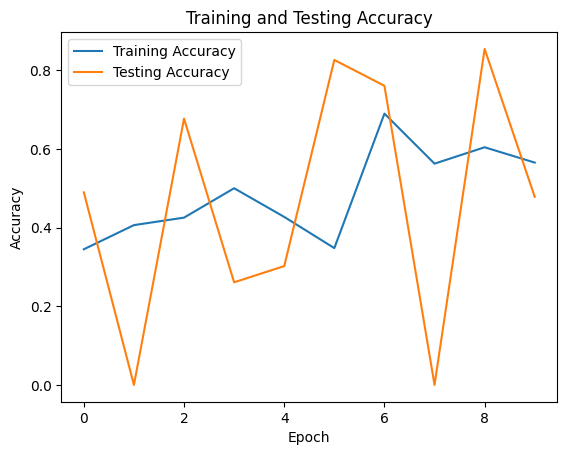

In [17]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Testing Accuracy')
plt.show()

#### **Sample Predictions**

In [18]:
# Sample predictions
test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


In [19]:
# Converting predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# retrieving the class labels from the training data generator
class_labels = list(train_generator.class_indices.keys())

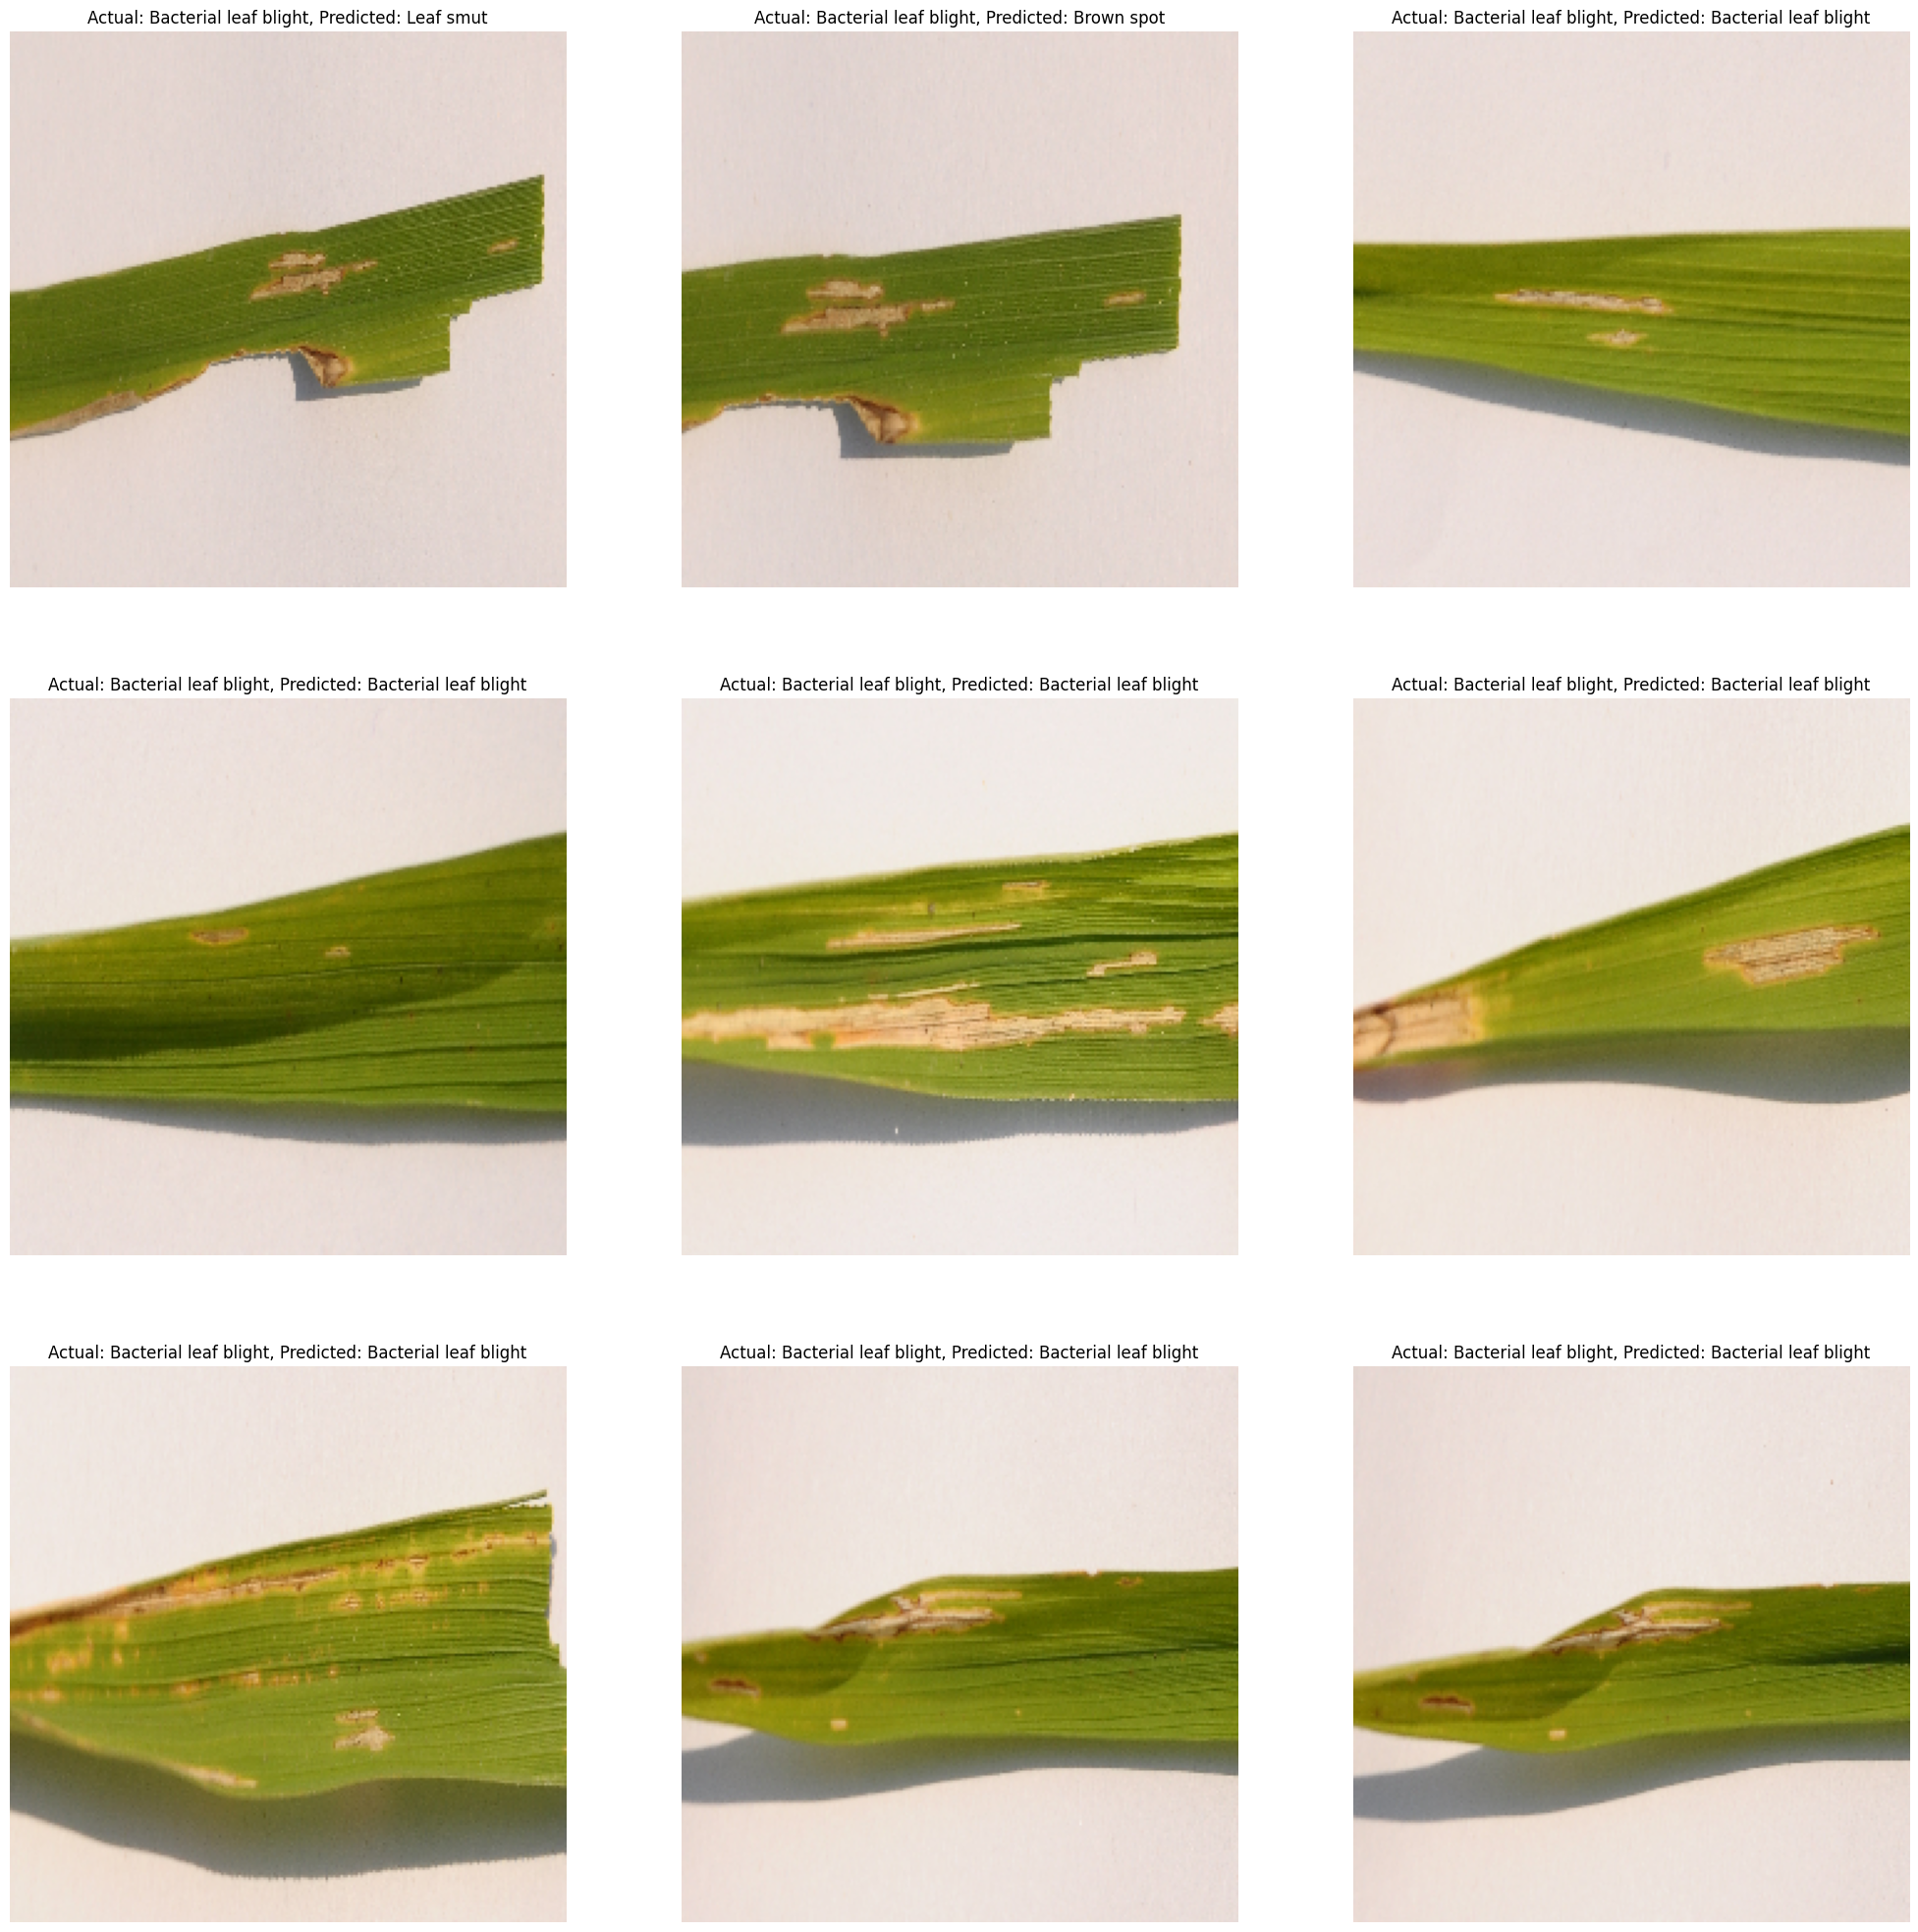

In [20]:
# Displaying sample predictions
plt.figure(figsize=(25, 25))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[i])
    plt.title(f'Actual: {class_labels[np.argmax(test_labels[i])]}, Predicted: {class_labels[predicted_classes[i]]}')
    plt.axis('off')
plt.show()

#### **Model Prediction using External image**

In [21]:
# Predicting on custom input image
from keras.preprocessing import image
custom_img_path = r'E:\Rice_leaf_disease_prediction\Data\Brown spot\DSC_0100.jpg'
custom_img = image.load_img(custom_img_path, target_size=IMAGE_SIZE)
custom_img_array = image.img_to_array(custom_img)
custom_img_array = np.expand_dims(custom_img_array, axis=0)  # Adding batch dimension
custom_img_array /= 255.  # Normalize pixel values

# Making prediction
custom_prediction = model.predict(custom_img_array)
custom_predicted_class = class_labels[np.argmax(custom_prediction)]
print("Custom input image predicted class:", custom_predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step
Custom input image predicted class: Brown spot


#### **MODEL REPORT**

#### **Rice Leaf Disease Classification Model**

#### Overview:
- This model is designed to classify rice leaf diseases based on input images into different types such as **brown spot, leaf-smut and bacterial leaf blight**.

- It utilizes a **convolutional neural network (CNN) architecture**, specifically a modified VGG16 model, for image classification. 

#### Model Components:
1. **Data Preprocessing:**
   - The input images are preprocessed using an `ImageDataGenerator` with various augmentation techniques, including rescaling, rotation, shifting, shearing, zooming, and flipping. 
   
   - These augmentations help increase the diversity of the training data and improve the model's generalization ability.

2. **Model Architecture:**
   - The model architecture consists of a modified VGG16 convolutional base followed by **custom classification layers.**

   - The convolutional base of the VGG16 model is used for feature extraction. It is initialized with pre-trained weights from the ImageNet dataset and frozen during training to prevent further weight updates.

   - On top of the convolutional base, a `global average pooling layer` is added to reduce dimensionality, followed by dense layers for classification. 
   
   - ReLU activation is used in the hidden layers, and softmax activation is used in the output layer for multi-class classification.

3. **Training Process:**
   - The model is trained using the `fit()` method with data from the training generator. Training proceeds for a specified number of epochs (here 10), with performance evaluated on the validation data after each epoch.

   - The training process involves minimizing the categorical cross-entropy loss function using the Adam optimizer.

   - Model performance metrics such as accuracy are monitored during training to assess training progress and model convergence.

4. **Evaluation:**

   - After training, the model's performance is evaluated on a separate test dataset using the `evaluate()` method. Evaluation metrics include test loss and test accuracy.

   - The evaluation results provide insights into the model's performance on unseen data and its ability to generalize to new samples.

5. **Prediction on Custom Input:**
   - The trained model can make predictions on custom input images. These images are preprocessed, passed through the model, and classified into one of the disease categories.

   - Predictions are made using the `predict()` method, and the predicted class labels are derived from the model's output probabilities.


#### **CHALLENGES FACED**
1. **Limited Data Availability:** 
  - The dataset is limited with around 119 images hence model generalization with improved accuracy of the model remained challenging.

2. **Choose the apt model**: 
  - In this problem of classifying rice leaf diseases, choosing a particular type of CNN model required some scrutiny in  selecting the one that best meets the requirements in terms of accuracy, efficiency, and resource constraints.
 
  - Therefore ***transfer learning from pre-trained models (e.g., using ImageNet weights)*** is used here (especially with limited labeled data). 

3. **Interpretability of new unseen data:** 
  - Since the model's accuracy is around 78%, it's predicting capacity to new unseen data sample is accurate to only some extent.  

  - Continuous monitoring and updating of the model with new data are necessary to ensure its relevance and effectiveness over time. But the limited computational resource here is quite challenging.

#### **CONCLUSION**

The developed model demonstrates effective classification of rice leaf diseases based on input images. Through appropriate data preprocessing, model architecture design, and training procedures, the model achieves accuracy of 78%. It can serve as a ***valuable tool for automated disease diagnosis and monitoring in rice cultivation***, contributing to improved crop management and yield optimization.